In [1]:
from google.colab import files

uploaded = files.upload()

Saving small_corpus.csv to small_corpus.csv


In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('small_corpus.csv')

In [5]:
reviews = df['reviews']

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
# for review in reviews:
#   print(type(review))

In [8]:
lst_tokenized_reviews = []

for review in reviews:
  tokenized_review = [word_tokenize(tokenized_sentence) for tokenized_sentence in sent_tokenize(str(review))]
  lst_tokenized_reviews.append(tokenized_review)

lst_tokenized_reviews

[[['Recently',
   'UBISOFT',
   'had',
   'to',
   'settle',
   'a',
   'huge',
   'class-action',
   'suit',
   'brought',
   'against',
   'the',
   'company',
   'for',
   'bundling',
   '(',
   'the',
   'notoriously',
   'harmful',
   ')',
   'StarFORCE',
   'DRM',
   'with',
   'its',
   'released',
   'games',
   '.'],
  ['So', 'what', 'the', 'geniuses', 'at', 'the', 'helm', 'do', 'next', '?'],
  ['They',
   'decide',
   'to',
   'make',
   'the',
   'same',
   'mistake',
   'yet',
   'again',
   '-',
   'by',
   'choosing',
   'the',
   'same',
   'DRM',
   'scheme',
   'that',
   'made',
   'BIOSHOCK',
   ',',
   'MASS',
   'EFFECT',
   'and',
   'SPORE',
   'infamous',
   ':',
   'SecuROM',
   '7.xx',
   'with',
   'LIMITED',
   'ACTIVATIONS',
   '!'],
  ['MASS',
   'EFFECT',
   'can',
   'be',
   'found',
   'in',
   'clearance',
   'bins',
   'only',
   'months',
   'after',
   'its',
   'release',
   ';',
   'SPORE',
   'not',
   'only',
   'undersold',
   'miserably',
   

In [9]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [10]:
from nltk.corpus import opinion_lexicon
opinion_lexicon.words()[:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [11]:
from collections import Counter
d_negative = Counter(opinion_lexicon.negative())

In [12]:
d_positive = Counter(opinion_lexicon.positive())

In [68]:
def score_sentence(lst_words):
  total = 0
  sent = 0
  for word in lst_words:
    total += 1
    if word in d_positive:
      sent += 1
    elif word in d_negative:
      sent -= 1

  return sent / total

In [14]:
from datetime import datetime

def util_print_time():
  now = datetime.now() # current date and time
  date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
  print(date_time)

count = 0
lst_sent_reviews = []

for tokenized_review in lst_tokenized_reviews:
  if count % 1000 == 0:
    util_print_time()
  sent_review = sum([score_sentence(tokenized_sentence) for tokenized_sentence in tokenized_review])
  lst_sent_reviews.append(sent_review)
  count += 1

print(lst_tokenized_reviews[:5])
print(lst_sent_reviews[:5])
print(df['ratings'][:5])

12/27/2021, 12:30:23
12/27/2021, 12:30:23
12/27/2021, 12:30:23
12/27/2021, 12:30:23
12/27/2021, 12:30:23
12/27/2021, 12:30:23
[[['Recently', 'UBISOFT', 'had', 'to', 'settle', 'a', 'huge', 'class-action', 'suit', 'brought', 'against', 'the', 'company', 'for', 'bundling', '(', 'the', 'notoriously', 'harmful', ')', 'StarFORCE', 'DRM', 'with', 'its', 'released', 'games', '.'], ['So', 'what', 'the', 'geniuses', 'at', 'the', 'helm', 'do', 'next', '?'], ['They', 'decide', 'to', 'make', 'the', 'same', 'mistake', 'yet', 'again', '-', 'by', 'choosing', 'the', 'same', 'DRM', 'scheme', 'that', 'made', 'BIOSHOCK', ',', 'MASS', 'EFFECT', 'and', 'SPORE', 'infamous', ':', 'SecuROM', '7.xx', 'with', 'LIMITED', 'ACTIVATIONS', '!'], ['MASS', 'EFFECT', 'can', 'be', 'found', 'in', 'clearance', 'bins', 'only', 'months', 'after', 'its', 'release', ';', 'SPORE', 'not', 'only', 'undersold', 'miserably', 'but', 'also', 'made', 'history', 'as', 'the', 'boiling', 'point', 'of', 'gamers', 'lashing', 'back', ',', '

In [15]:
print(lst_tokenized_reviews[-5:])
print(lst_sent_reviews[-5:])
print(df['ratings'][-5:])

[[['Nice', 'long', 'micro', 'USB', 'cable', ',', 'battery', 'lasts', 'a', 'long', 'time', ',', 'seemingly', 'longer', 'than', 'it', 'did', 'with', 'AAs', '.']], [['I', "'ve", 'been', 'having', 'a', 'great', 'time', 'with', 'this', 'game', '.'], ['I', 'love', 'it', '.']], [['d']], [['Really', 'pretty', ',', 'funny', ',', 'interesting', 'game', '.'], ['Works', 'well', '.'], ['I', 'recommend', 'it', 'for', 'all', 'ages', '.']], [['i', 'had', 'a', 'lot', 'of', 'fun', 'playing', 'this', 'game', ',', 'if', 'your', 'looking', 'for', 'a', 'game', 'to', 'jump', 'into', 'with', 'not', 'much', 'overthinking', 'this', 'is', 'the', 'game']]]
[0.0, 0.34090909090909094, 0.0, 0.6011904761904762, 0.037037037037037035]
5495    5.0
5496    5.0
5497    5.0
5498    5.0
5499    5.0
Name: ratings, dtype: float64


In [16]:
# you can see it works a bit but not enough, let's try to normalize the results according to number of words counted (and normalize also the sentences according to it)

In [75]:
def score_sentence(lst_words):
  total = 0
  counter = 0
  sentiment = 0
  for word in lst_words:
    total += 1 
    if word in d_positive:
      sentiment += 1
      counter += 1
    elif word in d_negative:
      sentiment -= 1
      counter += 1

  return sentiment, counter, total

In [18]:
def review_score(tokenized_review):
  sent_review = 0
  # sent = 0
  total = 0
  for tokenized_sentence in tokenized_review:
    sent_sentence, counter, _ = score_sentence(tokenized_sentence)
    sent_review += sent_sentence
    total += counter

  if total > 0:
    return sent_review / total
  else:
    return None

count = 0
lst_sent_reviews = []

for tokenized_review in lst_tokenized_reviews:
  if count % 1000 == 0:
    util_print_time()
  sent_review = review_score(tokenized_review)
  lst_sent_reviews.append(sent_review)
  count += 1

print(reviews[:5])
print(lst_sent_reviews[:5])
print(df['ratings'][:5])
print(reviews[-5:])
print(lst_sent_reviews[-5:])
print(df['ratings'][-5:])

12/27/2021, 12:30:23
12/27/2021, 12:30:23
12/27/2021, 12:30:23
12/27/2021, 12:30:23
12/27/2021, 12:30:24
12/27/2021, 12:30:24
0    Recently UBISOFT had to settle a huge class-ac...
1                   code didn't work, got me a refund.
2    these do not work at all, all i get is static ...
3    well let me start by saying that when i first ...
4    Dont waste your money, you will just end up us...
Name: reviews, dtype: object
[-0.3125, 1.0, 0.0, -0.2692307692307692, 0.0]
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ratings, dtype: float64
5495    Nice long micro USB cable, battery lasts a lon...
5496    I've been having a great time with this game. ...
5497                                                    d
5498    Really pretty, funny, interesting game. Works ...
5499    i had a lot of fun playing this game, if your ...
Name: reviews, dtype: object
[None, 1.0, None, 0.6, 1.0]
5495    5.0
5496    5.0
5497    5.0
5498    5.0
5499    5.0
Name: ratings, dtype: float64


In [19]:
# looks better, not I need to make everything lower case

In [20]:
reviews = reviews.str.lower()

In [21]:
lst_tokenized_reviews = []

for review in reviews:
  tokenized_review = [word_tokenize(tokenized_sentence) for tokenized_sentence in sent_tokenize(str(review))]
  lst_tokenized_reviews.append(tokenized_review)

lst_tokenized_reviews

[[['recently',
   'ubisoft',
   'had',
   'to',
   'settle',
   'a',
   'huge',
   'class-action',
   'suit',
   'brought',
   'against',
   'the',
   'company',
   'for',
   'bundling',
   '(',
   'the',
   'notoriously',
   'harmful',
   ')',
   'starforce',
   'drm',
   'with',
   'its',
   'released',
   'games',
   '.'],
  ['so', 'what', 'the', 'geniuses', 'at', 'the', 'helm', 'do', 'next', '?'],
  ['they',
   'decide',
   'to',
   'make',
   'the',
   'same',
   'mistake',
   'yet',
   'again',
   '-',
   'by',
   'choosing',
   'the',
   'same',
   'drm',
   'scheme',
   'that',
   'made',
   'bioshock',
   ',',
   'mass',
   'effect',
   'and',
   'spore',
   'infamous',
   ':',
   'securom',
   '7.xx',
   'with',
   'limited',
   'activations',
   '!'],
  ['mass',
   'effect',
   'can',
   'be',
   'found',
   'in',
   'clearance',
   'bins',
   'only',
   'months',
   'after',
   'its',
   'release',
   ';',
   'spore',
   'not',
   'only',
   'undersold',
   'miserably',
   

In [22]:
count = 0
lst_sent_reviews = []

for tokenized_review in lst_tokenized_reviews:
  if count % 1000 == 0:
    util_print_time()
  sent_review = review_score(tokenized_review)
  lst_sent_reviews.append(sent_review)
  count += 1

print(reviews[:5])
print(lst_sent_reviews[:5])
print(df['ratings'][:5])
print(reviews[-5:])
print(lst_sent_reviews[-5:])
print(df['ratings'][-5:])

12/27/2021, 12:30:34
12/27/2021, 12:30:34
12/27/2021, 12:30:35
12/27/2021, 12:30:35
12/27/2021, 12:30:35
12/27/2021, 12:30:35
0    recently ubisoft had to settle a huge class-ac...
1                   code didn't work, got me a refund.
2    these do not work at all, all i get is static ...
3    well let me start by saying that when i first ...
4    dont waste your money, you will just end up us...
Name: reviews, dtype: object
[-0.35135135135135137, 1.0, 0.0, -0.2982456140350877, 0.0]
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ratings, dtype: float64
5495    nice long micro usb cable, battery lasts a lon...
5496    i've been having a great time with this game. ...
5497                                                    d
5498    really pretty, funny, interesting game. works ...
5499    i had a lot of fun playing this game, if your ...
Name: reviews, dtype: object
[1.0, 1.0, None, 0.6666666666666666, 1.0]
5495    5.0
5496    5.0
5497    5.0
5498    5.0
5499    5.0
Name: ratings, 

In [23]:
# looks much better!

In [24]:
!pip install altair_viewer

     |████████████████████████████████| 844 kB 5.5 MB/s 


In [25]:
import altair as alt
import altair_viewer

In [26]:
chart = alt.Chart(df).mark_bar().encode(x = 'ratings:O', y = 'count():Q')
chart.show()

MaxRowsError: ignored

In [27]:
!pip install altair_transform

     |████████████████████████████████| 51 kB 198 kB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 


In [28]:
from altair_transform import transform_chart
new_chart = transform_chart(chart)
new_chart

alt.Chart(...)

In [29]:
# as we were aware, the most common ratings are 1, 2, and 5-stars with 1,500 examples each

In [30]:
import numpy as np

hist_vals, bins = np.histogram(list(filter(None, lst_sent_reviews)), bins=5)
print(hist_vals)
print(bins)

[ 451  761  846 1119 1494]
[-1.  -0.6 -0.2  0.2  0.6  1. ]


In [31]:
# import matplotlib.pyplot as plt

# plt.plot(bins[:-1], hist_vals)

(array([ 451.,  761.,  846., 1119., 1494.]),
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ]),
 <a list of 5 Patch objects>)

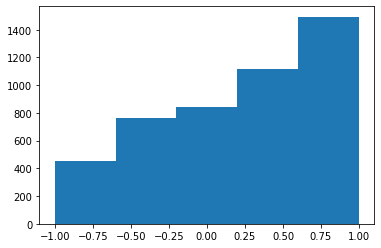

In [36]:
import matplotlib.pyplot as plt

plt.hist(list(filter(None, lst_sent_reviews)), bins)

In [37]:
# You can see that the slope is going up, which means there is a tendancy to give a review a positive rating

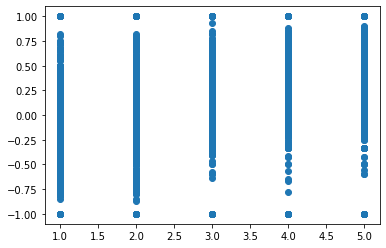

In [38]:
plt.scatter(df['ratings'], lst_sent_reviews)
plt.show()

In [39]:
# it's hard to know, you can see generally the dots going up as well the ratings-axis goes up. However, it seems negligible and you can't know for sure for the whole population.

In [40]:
from numpy import cov
from scipy.stats import pearsonr

ratings = df['ratings']

lst_new_sentiment_review = []
lst_new_ratings = []
for lsr, rating in zip(lst_sent_reviews, ratings):
  if lsr is not None:
    lst_new_sentiment_review.append(lsr)
    lst_new_ratings.append(rating)

corr, _ = pearsonr(lst_new_ratings, lst_new_sentiment_review)
print(corr)

0.5386202051510697


In [41]:
# we can see a small correlation between the ratings and the sentiment of the reviews

In [42]:
from scipy.stats import spearmanr

corr, _ = spearmanr(lst_new_ratings, lst_new_sentiment_review)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.540


In [43]:
# we get pretty much the same correlation

In [45]:
# Let's study the border cases

In [46]:
df['sentiment_scores'] = lst_sent_reviews

In [47]:
df.head()

Unnamed: 0  ...  sentiment_scores
0           0  ...         -0.351351
1           1  ...          1.000000
2           2  ...          0.000000
3           3  ...         -0.298246
4           4  ...          0.000000

[5 rows x 4 columns]

In [49]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
pd.set_option('display.maxwidth', 1000)

In [50]:
df.sort_values(['ratings', 'sentiment_scores'], ascending=[0, 1])

Unnamed: 0  ...  sentiment_scores
4239        4239  ...              -1.0
4323        4323  ...              -1.0
4326        4326  ...              -1.0
4403        4403  ...              -1.0
4613        4613  ...              -1.0
...          ...  ...               ...
1391        1391  ...               NaN
1432        1432  ...               NaN
1483        1483  ...               NaN
1491        1491  ...               NaN
1494        1494  ...               NaN

[5500 rows x 4 columns]

In [51]:
# You can see the positive reviews describe negative facts of the game (scary and etc.), this can be intrepreted in certain contexts as positive

In [52]:
df.sort_values(['ratings', 'sentiment_scores'], ascending=[1, 0])

Unnamed: 0  ...  sentiment_scores
1              1  ...               1.0
5              5  ...               1.0
17            17  ...               1.0
19            19  ...               1.0
32            32  ...               1.0
...          ...  ...               ...
5430        5430  ...               NaN
5433        5433  ...               NaN
5458        5458  ...               NaN
5492        5492  ...               NaN
5497        5497  ...               NaN

[5500 rows x 4 columns]

In [53]:
# seems that didn't and won't are not in the vocabulary

In [54]:
"won't" in d_negative

False

In [55]:
"didn't" in d_negative

False

In [56]:
"not" in d_negative

False

In [57]:
"no" in d_negative

False

In [58]:
d_negative

Counter({'2-faced': 1,
         '2-faces': 1,
         'abnormal': 1,
         'abolish': 1,
         'abominable': 1,
         'abominably': 1,
         'abominate': 1,
         'abomination': 1,
         'abort': 1,
         'aborted': 1,
         'aborts': 1,
         'abrade': 1,
         'abrasive': 1,
         'abrupt': 1,
         'abruptly': 1,
         'abscond': 1,
         'absence': 1,
         'absent-minded': 1,
         'absentee': 1,
         'absurd': 1,
         'absurdity': 1,
         'absurdly': 1,
         'absurdness': 1,
         'abuse': 1,
         'abused': 1,
         'abuses': 1,
         'abusive': 1,
         'abysmal': 1,
         'abysmally': 1,
         'abyss': 1,
         'accidental': 1,
         'accost': 1,
         'accursed': 1,
         'accusation': 1,
         'accusations': 1,
         'accuse': 1,
         'accuses': 1,
         'accusing': 1,
         'accusingly': 1,
         'acerbate': 1,
         'acerbic': 1,
         'acerbically': 1

In [59]:
'demoralizing' in d_negative

True

In [60]:
d_negative['no'] = 1
d_negative['not'] = 1
d_negative["didn't"] = 1
d_negative["won't"] = 1

In [64]:
# score_sentence("code didn't work, got me a refund.")

In [76]:
score_sentence(word_tokenize("code didn't work, got me a refund."))

(2, 2, 10)

In [71]:
"work" in d_positive

True

In [72]:
"refund" in d_positive

True

In [73]:
"got" in d_positive

False

In [74]:
"didn't" in d_negative

True

In [77]:
word_tokenize("code didn't work, got me a refund.")

['code', 'did', "n't", 'work', ',', 'got', 'me', 'a', 'refund', '.']

In [78]:
d_negative["n't"] = 1

In [79]:
score_sentence(word_tokenize("code didn't work, got me a refund."))

(1, 3, 10)

In [80]:
# bug fixed

In [81]:
review_score([word_tokenize("code didn't work, got me a refund.")])

0.3333333333333333

In [82]:
# looks better - now let's make the mark negation

In [87]:
from nltk.sentiment.util import mark_negation

print(score_sentence(mark_negation(word_tokenize("code didn't work, got me a refund."))))
review_score([mark_negation(word_tokenize("code didn't work, got me a refund."))])

(-1, 1, 10)


-1.0

In [88]:
# looks awesome!!!

In [89]:
# let's calculate everything from the beginning

In [93]:
def review_score_with_negation(tokenized_review): 
  return review_score(mark_negation(tokenized_review))

In [94]:
review_score_with_negation([word_tokenize("code didn't work, got me a refund.")])

-1.0

In [97]:
# count = 0
lst_sentiment_reviews_with_negation = []

for tokenized_review in lst_tokenized_reviews:
  # if count % 1000 == 0:
  #   util_print_time()
  sentiment_review_with_negation = review_score_with_negation(tokenized_review)
  lst_sentiment_reviews_with_negation.append(sentiment_review_with_negation)
  # count += 1

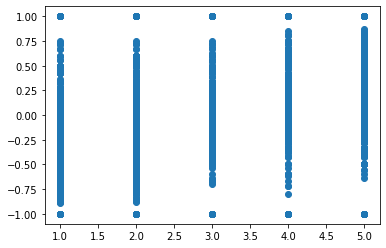

In [98]:
plt.scatter(df['ratings'], lst_sentiment_reviews_with_negation)
plt.show()

In [99]:
# It's very hard to tell whether it helped or not

In [105]:
lst_new_sentiment_reviews_with_negation = []
lst_new_ratings2 = []
for lsrwn, rating in zip(lst_sentiment_reviews_with_negation, ratings):
  if lsrwn is not None:
    lst_new_sentiment_reviews_with_negation.append(lsrwn)
    lst_new_ratings2.append(rating)

In [107]:
corr, _ = pearsonr(lst_new_ratings2, lst_new_sentiment_reviews_with_negation)
print(corr)

0.62852647954734


In [108]:
# correlation is better means the model was improved!

In [109]:
corr, _ = spearmanr(lst_new_ratings2, lst_new_sentiment_reviews_with_negation)
print(corr)

0.6190124247888555


In [110]:
# They are still very close to each other, and it's hard to tell which one is better

In [113]:
df['sentiment_scores'] = lst_sentiment_reviews_with_negation

In [119]:
df.head()

ratings                                            reviews  sentiment_scores
0      1.0  Recently UBISOFT had to settle a huge class-ac...         -0.428571
1      1.0                 code didn't work, got me a refund.         -1.000000
2      1.0  these do not work at all, all i get is static ...         -1.000000
3      1.0  well let me start by saying that when i first ...         -0.384615
4      1.0  Dont waste your money, you will just end up us...               NaN

In [120]:
df.to_csv('small_corpus_with_opinion_sentiment.csv')